## Replace this text with your name

In the cell below, include **all** your ``import`` statements

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Use Heun's method to calculate the trajectory of a particle undergoing projectile motion with initial conditions $(x, y) = (0, 0)$ and $(v_x, v_y) = (30, 40)~{\rm m/s}$. In doing so, you should
- use a time stepping function that uses the powers of arrays as both inputs and outputs to your function (you should also use an energy function that takes an array as an input)
- make two separate plots: (1) y vs. x; and (2) energy vs. time

Text(0.5, 1.0, 'Energy Vs Time')

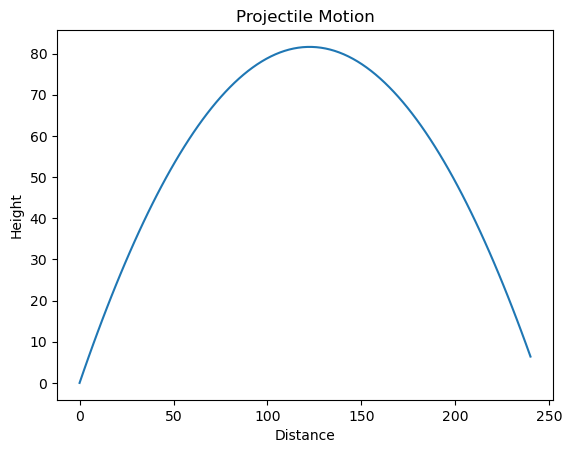

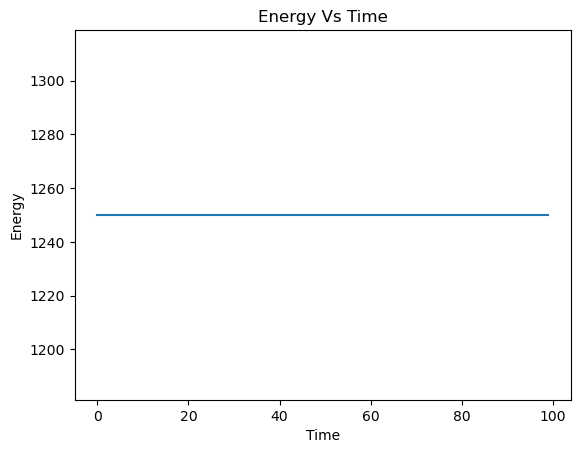

In [5]:
def heuns_rule(x_in, dt):
    ax = 0
    ay = -9.8
    derivative1 = np.zeros(4)
    derivative2 = np.zeros(4)
    derivative1[:] = [x_in[2], x_in[3], ax, ay]
    k1 = derivative1 * dt
    derivative2[:] = [x_in[2]+k1[2], x_in[3]+k1[3], ax, ay]
    k2 = derivative2 *dt
    x_final = x_in + (0.5*(k1+k2))
    return x_final
    
def energy_function_array(x_in):
    return inst_energy(x_in[0], x_in[1], x_in[2], x_in[3])

def inst_energy(x, y, vx, vy):
    g = 9.8
    E = ((1/2)*((vx**2)+(vy**2)))+(g*y)
    return E

x = 0
y = 0
vx = 30
vy = 40

time = np.linspace(0,8,100)
dt = time[1] - time[0]
x_step = np.zeros(len(time))
y_step = np.zeros(len(time))
energy = np.zeros(len(time))

x_array = np.zeros(4)
x_array[:] = [x, y, vx, vy]

x_step[0] = x_array[0]
y_step[0] = x_array[1]
energy[0] = energy_function_array(x_array)

for i in range(1, len(time)):
    x_array = heuns_rule(x_array, dt)
    energy[i] = energy_function_array(x_array)
    x_step[i] = x_array[0]
    y_step[i] = x_array[1]


plt.plot(x_step,y_step)

plt.xlabel("Distance")
plt.ylabel("Height")
plt.title("Projectile Motion")

plt.figure()
plt.plot(energy)
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title("Energy Vs Time")




**Exercise:** Include air resistance:
$$\displaystyle \frac{dx}{dt} = v_x \qquad \qquad \frac{d v_x}{dt} = a_x = - b v_x$$
$$\displaystyle \frac{dy}{dt} = v_y \qquad \qquad \frac{d v_y}{dt} = a_y = -g - b v_y$$
using $g = 9.8$ and $b = 0.1$. 
- Again, we will use Heun's method with functions that work with arrays
- make two separate plots: (1) y vs. x; and (2) energy vs. time

Text(0.5, 1.0, 'Energy Vs Time')

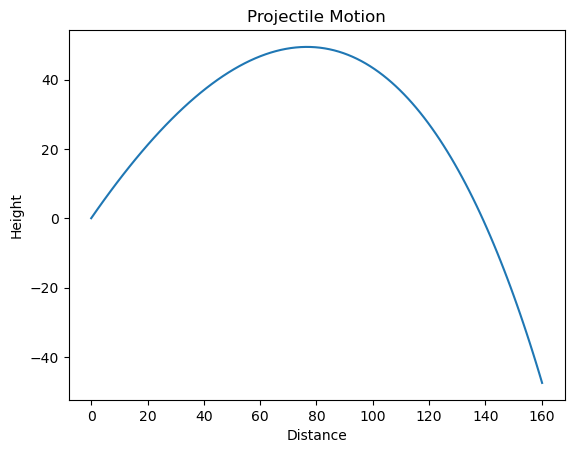

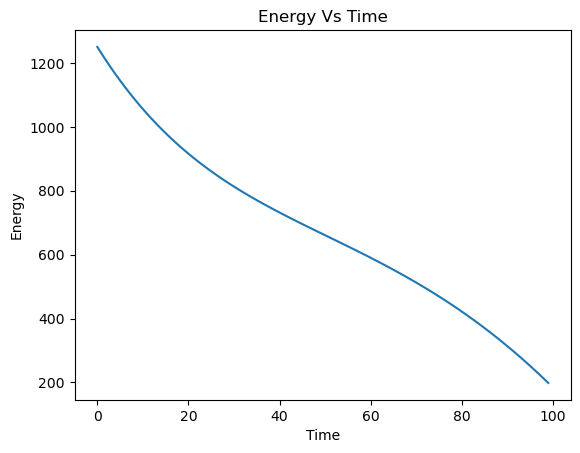

In [7]:
def add_air(x_in, dt):
    g = 9.8
    b = 0.1
    k1 = np.zeros(4)
    k2 = np.zeros(4)
    k1[:] = [x_in[2], x_in[3], (-b)*x_in[2], (-g)-(b*(x_in[3]))]
    k2[:] = [x_in[2] + k1[2], x_in[3] + k1[3], (-b)*(x_in[2]+k1[2]), (-g)-(b*((x_in[3])+k1[3]))]
    x_final = x_in + (0.5*(((k1+k2)*dt)))
    return x_final
    
time = np.linspace(0,8,100)
dt = time[1] - time[0]
x_step = np.zeros(len(time))
y_step = np.zeros(len(time))
energy = np.zeros(len(time))

x = 0
y = 0
vx = 30
vy = 40
energy[0] = energy_function_array(x_array)

x_array = np.zeros(4)
x_array[:] = [x, y, vx, vy]

x_step[0] = x_array[0]
y_step[0] = x_array[1]

for i in range(1, len(time)):
    x_array = add_air(x_array, dt)
    energy[i] = energy_function_array(x_array)
    x_step[i] = x_array[0]
    y_step[i] = x_array[1]

plt.plot(x_step,y_step)

plt.xlabel("Distance")
plt.ylabel("Height")
plt.title("Projectile Motion")

plt.figure()
plt.plot(energy)
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title("Energy Vs Time")

Confirm that this all works by using ``Kernel > Restart Kernel and Run All Cells...``

When you are happy with your results, you will submit by uploading this file on Github.